In [407]:
# convert in python script by: jupyter nbconvert --to script Visu_output.ipynb
# run python script by: python3 Visu_output.py --interactive=0 --printvar=-1-2- 
# or python3 Visu_output.py --interactive=0 --printvar=all (to print all variables)

# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

print_interactive = True
#variables_to_display="all"
variables_to_display="all"

# for reading arguments on command line (use as a script possibly called from the program)
import sys
import re
print(sys.argv[0])
nb_arguments=len(sys.argv)
if (nb_arguments > 1):
    for i in range(1,nb_arguments):
        print(sys.argv[i])
        if re.match("--interactive=*",sys.argv[i]):
            print_interactive = int((sys.argv[i]).split( "=", 1 )[1])
        if re.match("--printvar=*",sys.argv[i]):
            variables_to_display= (sys.argv[i]).split( "=", 1 )[1]
            
os.chdir('../output')
#print(glob.glob('x*outer.out'))
filenames_outer = sorted(glob.glob('x*outer.out'))
filenames_exact = sorted(glob.glob('x*exact.out'))
filenames_inner = sorted(glob.glob('x*inner.out'))
filenames_inner_minimal = sorted(glob.glob('x*inner_minimal.out'))
filenames_outer_minimal = sorted(glob.glob('x*outer_minimal.out'))
filenames_inner_robust = sorted(glob.glob('x*inner_robust.out'))
filenames_outer_robust = sorted(glob.glob('x*outer_robust.out'))

/Users/sylvie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py
-f
/Users/sylvie/Library/Jupyter/runtime/kernel-d7644aa1-a80b-42a5-b64b-1a88c9dced3d.json


In [408]:
    width_in_inches = 12
    height_in_inches = 9
    dots_per_inch = 100
    #fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    from matplotlib.patches import Rectangle, Polygon
    from matplotlib.collections import PatchCollection
    import os.path
    from os import path
    
    def print_xy(varx,vary):
        fig, ax = plt.subplots(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
        # print maximal outer and inner approximations for each component separately
        
        fx_outer = varx + 'outer.out'
        fy_outer = vary + 'outer.out'
        if (path.isfile(fx_outer) and path.isfile(fy_outer)):
            with open(fx_outer, 'r') as x_outer, open(fy_outer, 'r') as y_outer:
                linesx_outer = x_outer.readlines()
                tx_outer = [float(line.split()[0]) for line in linesx_outer]
                xmin_outer = [float(line.split()[1]) for line in linesx_outer]
                xmax_outer = [float(line.split()[2]) for line in linesx_outer]
                linesy_outer = y_outer.readlines()
                ty_outer = [float(line.split()[0]) for line in linesy_outer]
                ymin_outer = [float(line.split()[1]) for line in linesy_outer]
                ymax_outer = [float(line.split()[2]) for line in linesy_outer]
           
                for xo1,xo2,yo1,yo2 in zip(xmin_outer,xmax_outer,ymin_outer,ymax_outer):
                    car_fig = Rectangle([xo1,yo1],xo2-xo1,yo2-yo1,ec='black', color='black',alpha=0.1,zorder=1)
                    ax.add_patch(car_fig)
        
        fxy_inner = varx + vary + 'inner_joint.out'
        if (path.isfile(fxy_inner)):
            with open (fxy_inner, 'r') as xy_inner:
                linesxy_inner = xy_inner.readlines()
                for line in linesxy_inner:
                    xi1 = float(line.split()[2])
                    xi2 = float(line.split()[3])
                    yi1 = float(line.split()[4])
                    yi2 = float(line.split()[5])
                    if re.match((line.split()[0]),'maxskew') or re.match((line.split()[0]),'minskew')  or re.match((line.split()[0]),'robskew'):
                        xi3 = float(line.split()[6])
                        yi3 = float(line.split()[7])
                        xi4 = float(line.split()[8])
                        yi4 = float(line.split()[9])
                    if re.match((line.split()[0]),'maximal'):
                        car_fig = Rectangle([xi1,yi1],xi2-xi1,yi2-yi1, color='blue',alpha=0.5,zorder=2)
                    if re.match((line.split()[0]),'robust'):
                        car_fig = Rectangle([xi1,yi1],xi2-xi1,yi2-yi1, color='orange',alpha=0.5,zorder=3)
                    if re.match((line.split()[0]),'minimal'):
                        car_fig = Rectangle([xi1,yi1],xi2-xi1,yi2-yi1, color='red',alpha=0.5,zorder=4)
                    if re.match((line.split()[0]),'maxskew'):    
                        car_fig = Polygon([(xi1,xi2), (yi1,yi2), (xi3,yi3), (xi4,yi4)], color='blue',alpha=0.5,zorder=2)
                    if re.match((line.split()[0]),'robskew'):    
                        car_fig = Polygon([(xi1,xi2), (yi1,yi2), (xi3,yi3), (xi4,yi4)], color='orange',alpha=0.5,zorder=2)
                    if re.match((line.split()[0]),'minskew'):    
                        car_fig = Polygon([(xi1,xi2), (yi1,yi2), (xi3,yi3), (xi4,yi4)], color='red',alpha=0.5,zorder=2)
                    ax.add_patch(car_fig)

            ax.autoscale()
            ax.set_xlabel(varx)
            ax.set_ylabel(vary)
         #   plt.legend()
            f_output= varx + vary
            plt.savefig(f_output)
            if (print_interactive):
                plt.show() 
            plt.close()
            
            
#print_xy_new("x1","x2")


In [409]:
# print joint ranges of variables to display
filenames_jointinner = sorted(glob.glob('*inner_joint.out'))
for f_inner in filenames_jointinner:
    variable = f_inner.rsplit( "inner_joint.out", 1 )[ 0 ]  # get variable name out of file names
    varx = variable.rsplit( "x", 1 )[ 0 ]
    vary = 'x'+variable.rsplit( "x", 1 )[ 1 ]
    varx_nb = '-' + varx.split( "x", 1 )[1] + '-'
    vary_nb = '-' + varx.split( "x", 1 )[1] + '-'
    if (re.match(varx_nb,variables_to_display) and re.match(vary_nb,variables_to_display)) or re.match("all",variables_to_display):
        print_xy(varx,vary)

In [410]:
width_in_inches = 12
height_in_inches = 9
dots_per_inch = 100
#fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection



def print_xyz(varx,vary,varz,print_robust,print_minimal):
   # fig, ax = plt.subplots(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    ax = Axes3D(fig)
    
    points = np.array([[-1, -1, -1],
            [1, -1, -1 ],
            [1, 1, -1],
            [-1, 1, -1],
            [-1, -1, 1],
            [1, -1, 1 ],
            [1, 1, 1],
            [-1, 1, 1]])
    
    # print maximal outer and inner approximations for each component separately
    
    fx_outer = varx + 'outer.out'
    fy_outer = vary + 'outer.out'
    fz_outer = varz + 'outer.out'
    
    if (path.isfile(fx_outer) and path.isfile(fy_outer) and path.isfile(fz_outer)):
        with open(fx_outer, 'r') as x_outer, open(fy_outer, 'r') as y_outer , open(fz_outer, 'r') as z_outer:
            linesx_outer = x_outer.readlines()
            tx_outer = [float(line.split()[0]) for line in linesx_outer]
            xmin_outer = [float(line.split()[1]) for line in linesx_outer]
            xmax_outer = [float(line.split()[2]) for line in linesx_outer]
            linesy_outer = y_outer.readlines()
            ty_outer = [float(line.split()[0]) for line in linesy_outer]
            ymin_outer = [float(line.split()[1]) for line in linesy_outer]
            ymax_outer = [float(line.split()[2]) for line in linesy_outer]
            linesz_outer = z_outer.readlines()
            tz_outer = [float(line.split()[0]) for line in linesz_outer]
            zmin_outer = [float(line.split()[1]) for line in linesz_outer]
            zmax_outer = [float(line.split()[2]) for line in linesz_outer]
                  
            for x1,x2,y1,y2,z1,z2 in zip(xmin_outer,xmax_outer,ymin_outer,ymax_outer,zmin_outer,zmax_outer):
                P = [[(x2-x1)/2 , 0 ,  0],
                 [0 ,  (y2-y1)/2 ,  0],
                 [0 ,  0 ,  (z2-z1)/2]]
                
                Z = np.array([[(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2]])
                
                for i in range(8): Z[i,:] += np.dot(points[i,:],P)

                # plot vertices
                ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])

                # list of sides' polygons of figure
                verts = [[Z[0],Z[1],Z[2],Z[3]], 
                [Z[4],Z[5],Z[6],Z[7]], 
                [Z[0],Z[1],Z[5],Z[4]], 
                [Z[2],Z[3],Z[7],Z[6]], 
                [Z[1],Z[2],Z[6],Z[5]],
                [Z[4],Z[7],Z[3],Z[0]]]

                # plot sides
          #      ax.add_collection3d(Line3DCollection(verts, linewidths=1, label='outer-approximation'))
          #      ax.add_collection3d(Poly3DCollection(verts, facecolors='grey', linewidths=1, edgecolors='k', label='maximal outer-approximation', alpha=0.05))

    fxyz_inner = varx + vary + varz + 'inner_joint3d.out'
    if (path.isfile(fxyz_inner)):
         with open(fxyz_inner, 'r') as xyz_inner:
            linesxyz_inner = xyz_inner.readlines()    
            for line in linesxyz_inner:
                x1 = float(line.split()[2])
                x2 = float(line.split()[3])
                y1 = float(line.split()[4])
                y2 = float(line.split()[5])
                z1 = float(line.split()[6])
                z2 = float(line.split()[7])
                
                P = [[(x2-x1)/2 , 0 ,  0],
                 [0 ,  (y2-y1)/2 ,  0],
                 [0 ,  0 ,  (z2-z1)/2]]
                
                Z = np.array([[(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2],
                  [(x1+x2)/2, (y1+y2)/2, (z1+z2)/2]])
                
                for i in range(8): Z[i,:] += np.dot(points[i,:],P)

                # plot vertices
                ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])

                # list of sides' polygons of figure
                verts = [[Z[0],Z[1],Z[2],Z[3]], 
                [Z[4],Z[5],Z[6],Z[7]], 
                [Z[0],Z[1],Z[5],Z[4]], 
                [Z[2],Z[3],Z[7],Z[6]], 
                [Z[1],Z[2],Z[6],Z[5]],
                [Z[4],Z[7],Z[3],Z[0]]]
                
                if re.match((line.split()[0]),'maximal'):
                    ax.add_collection3d(Poly3DCollection(verts, facecolors='blue', linewidths=1, edgecolors='b', label='maximal inner-approximation', alpha=.5))
                if re.match((line.split()[0]),'robust'):  
                    ax.add_collection3d(Poly3DCollection(verts, facecolors='orange', linewidths=1, edgecolors='orange', label='robust inner-approximation', alpha=.5))
                if re.match((line.split()[0]),'robust'):  
                    ax.add_collection3d(Poly3DCollection(verts, facecolors='red', linewidths=1, edgecolors='r', label='minimal inner-approximation', alpha=.5))        
            
    ax.autoscale()
    ax.set_xlabel(varx)
    ax.set_ylabel(vary)
    ax.set_zlabel(varz)
    #plt.legend()
    f_output= varx + vary + varz
    plt.savefig(f_output)
    if (print_interactive):
        plt.show() 
    plt.close()
#print_xyz("x2","x6","x10")

In [411]:
# print joint ranges of variables to display
filenames_jointinner3d = sorted(glob.glob('*inner_joint3d.out'))
for f_inner in filenames_jointinner3d:
    variable = f_inner.rsplit( "inner_joint3d.out", 1 )[ 0 ]  # get variable name out of file names
   # print(variable)
    varxvary = variable.rsplit( "x", 1 )[ 0 ]
    varx = varxvary.rsplit( "x", 1 )[ 0 ]
    vary = 'x'+varxvary.rsplit( "x", 1 )[ 1 ]
    varz = 'x'+variable.rsplit( "x", 1 )[ 1 ]
    varx_nb = '-' + varx.split( "x", 1 )[1] + '-'
    vary_nb = '-' + vary.split( "x", 1 )[1] + '-'
    varz_nb = '-' + varz.split( "x", 1 )[1] + '-'
    if (re.match(varx_nb,variables_to_display) and re.match(vary_nb,variables_to_display) and re.match(varz_nb,variables_to_display)) or re.match("all",variables_to_display):
        print_xyz(varx,vary,varz,print_robust,print_minimal)

In [412]:
# if print_robust = True: print robust approx
# if print_minimal = True: print minimal approx
# print maximal approx in any case
# if only_one_graph = True, print all components on same graph
# if subplots = True, print all components on one figure using subplots
# if print_interactive = False, only print in files, otherwise do both
def my_function(print_robust,print_minimal,only_one_graph,subplots,print_interactive,variables_to_display):
    
    nbsubplots = len(filenames_outer)
    nbcols = min(3,nbsubplots)
    nbrows = nbsubplots // nbcols
    nbrows += nbsubplots % nbcols
    position=range(1,nbsubplots+1)
    
    # larger figure if everything one one graph
    if (only_one_graph):
        width_in_inches = 10
        height_in_inches = 8
        dots_per_inch = 70
        fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    elif (subplots):
        width_in_inches = 12
        height_in_inches = 4*nbrows
        dots_per_inch = 70
        fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch) 
    else:
        fig = plt.figure()
    
    if (print_robust and print_minimal):
        extension = '_rob_min_max.png'
    elif (print_minimal):
        extension = '_min_max.png'
    elif (print_robust):
        extension = '_rob_max.png'
    else:
        extension = '_max.png'
    
    # print maximal outer and inner approximations for each component separately
    for f_outer,f_inner,f_exact,k in zip(filenames_outer, filenames_inner,filenames_exact,range(nbsubplots)):
        variable = f_outer.rsplit( "outer", 1 )[ 0 ]  # get variable name out of file names
        variable_nb = '-' + variable.split( "x", 1 )[1] + '-'
        # print only if variable is in list of variables to display
        if re.match(variable_nb,variables_to_display) or re.match("all",variables_to_display):  
            if (subplots):
                ax = fig.add_subplot(nbrows,nbcols,position[k])
            with open(f_outer, 'r') as x_outer, open(f_inner, 'r') as x_inner, open(f_exact, 'r') as x_exact:
                lines_outer = x_outer.readlines()
                t_outer = [float(line.split()[0]) for line in lines_outer]
                xmin_outer = [float(line.split()[1]) for line in lines_outer]
                xmax_outer = [float(line.split()[2]) for line in lines_outer]
                lines_exact = x_exact.readlines()
                t_exact = [float(line.split()[0]) for line in lines_exact]
                xmin_exact = [float(line.split()[1]) for line in lines_exact]
                xmax_exact = [float(line.split()[2]) for line in lines_exact]
                lines_inner = x_inner.readlines()
                t_inner = [] 
                xmin_inner = []
                xmax_inner = []
                for line in lines_inner:
                    if line.strip():
                        t_inner.append(float(line.split()[0]))
                        xmin_inner.append(float(line.split()[1]))
                        xmax_inner.append(float(line.split()[2]))
                    else:
                      #  plt.plot(t_outer ,xmin_outer, t_outer, xmax_outer, color='black')
                        if (subplots):
                            ax.fill_between(t_inner,xmin_inner,xmax_inner, label='maximal inner approx')
                        else:
                            plt.fill_between(t_inner,xmin_inner,xmax_inner, label='maximal inner approx')
                        t_inner = [] 
                        xmin_inner = []
                        xmax_inner = []
                if (subplots):
                    ax.plot(t_outer ,xmax_outer, color='black', label='maximal outer approx')
                    ax.plot(t_outer ,xmin_outer, color='black')
                    if (lines_exact):
                        ax.plot(t_exact ,xmax_exact, color='black', linestyle='dashed', label='exact reachable set')
                        ax.plot(t_exact ,xmin_exact, color='black', linestyle='dashed')
                    ax.fill_between(t_inner,xmin_inner,xmax_inner, label='maximal inner approx')
                    ax.title.set_text(variable)
                else:
                    plt.plot(t_outer , xmax_outer, color='black', label='maximal outer approx')
                    plt.plot(t_outer ,xmin_outer, color='black')
                    if (lines_exact):
                        plt.plot(t_exact , xmax_exact, color='black', linestyle='dashed', label='exact reachable set')
                        plt.plot(t_exact ,xmin_exact, color='black', linestyle='dashed')
                    plt.fill_between(t_inner,xmin_inner,xmax_inner, label='maximal inner approx')
                    #plt.show()

            if ((len(filenames_inner_minimal) != 0) and print_minimal):
                f_outer = variable + 'outer_minimal.out'
                f_inner = variable + 'inner_minimal.out'
                with open(f_outer, 'r') as x_outer, open(f_inner, 'r') as x_inner:
                    lines_outer = x_outer.readlines()
                    t_outer = [] 
                    xmin_outer = []
                    xmax_outer = []
                    for line in lines_outer:
                        if line.strip():
                            t_outer.append(float(line.split()[0]))
                            xmin_outer.append(float(line.split()[1]))
                            xmax_outer.append(float(line.split()[2]))
                        else:
                          #  plt.plot(t_outer ,xmin_outer, t_outer, xmax_outer, color='black')
                            if (subplots):
                                ax.plot(t_outer, xmax_outer, color='blue', label='minimal outer approx')
                                ax.plot(t_outer ,xmin_outer, color='blue')
                            else:
                                plt.plot(t_outer, xmax_outer, color='blue', label='minimal outer approx')
                                plt.plot(t_outer ,xmin_outer, color='blue')
                            t_outer = [] 
                            xmin_outer = []
                            xmax_outer = []
                    
                    lines_inner = x_inner.readlines()
                    t_inner = [] 
                    xmin_inner = []
                    xmax_inner = []
                    for line in lines_inner:
                        if line.strip():
                            t_inner.append(float(line.split()[0]))
                            xmin_inner.append(float(line.split()[1]))
                            xmax_inner.append(float(line.split()[2]))
                        else:
                          #  plt.plot(t_outer ,xmin_outer, t_outer, xmax_outer, color='black')
                            if (subplots):
                                ax.fill_between(t_inner,xmin_inner,xmax_inner, label='minimal inner approx')
                            else:
                                plt.fill_between(t_inner,xmin_inner,xmax_inner, label='minimal inner approx')
                            t_inner = [] 
                            xmin_inner = []
                            xmax_inner = []
                    if (subplots):
                        ax.plot(t_outer, xmax_outer, color='blue', label='minimal outer approx')
                        ax.plot(t_outer ,xmin_outer, color='blue')
                        ax.fill_between(t_inner,xmin_inner,xmax_inner, label='minimal inner approx')
                        ax.title.set_text(variable)
                    else:
                        plt.plot(t_outer, xmax_outer, color='blue', label='minimal outer approx')
                        plt.plot(t_outer ,xmin_outer, color='blue')
                       # plt.legend(pltlines[:2], label='minimal outer approx')
                        plt.fill_between(t_inner,xmin_inner,xmax_inner, label='minimal inner approx')
                        #plt.show()

            if ((len(filenames_inner_robust) != 0) and print_robust):
                f_outer = variable + 'outer_robust.out'
                f_inner = variable + 'inner_robust.out'
                with open(f_outer, 'r') as x_outer, open(f_inner, 'r') as x_inner:
                    lines_outer = x_outer.readlines()
                    t_outer = [] 
                    xmin_outer = []
                    xmax_outer = []
                    for line in lines_outer:
                        if line.strip():
                            t_outer.append(float(line.split()[0]))
                            xmin_outer.append(float(line.split()[1]))
                            xmax_outer.append(float(line.split()[2]))
                        else:
                          #  plt.plot(t_outer ,xmin_outer, t_outer, xmax_outer, color='black')
                            if (subplots):
                                ax.plot(t_outer, xmax_outer, color='green', label='robust outer approx')
                                ax.plot(t_outer ,xmin_outer, color='green')
                            else:
                                plt.plot(t_outer, xmax_outer, color='green', label='robust outer approx')
                                plt.plot(t_outer ,xmin_outer, color='green')
                            t_outer = [] 
                            xmin_outer = []
                            xmax_outer = []
                    
                    lines_inner = x_inner.readlines()
                    t_inner = [] 
                    xmin_inner = []
                    xmax_inner = []
                    for line in lines_inner:
                        if line.strip():
                            t_inner.append(float(line.split()[0]))
                            xmin_inner.append(float(line.split()[1]))
                            xmax_inner.append(float(line.split()[2]))
                        else:
                          #  plt.plot(t_outer ,xmin_outer, t_outer, xmax_outer, color='black')
                            if (subplots):
                                ax.fill_between(t_inner,xmin_inner,xmax_inner, label='robust inner approx')
                            else:
                                plt.fill_between(t_inner,xmin_inner,xmax_inner, label='robust inner approx')
                            t_inner = [] 
                            xmin_inner = []
                            xmax_inner = []
                    if (subplots):
                        ax.plot(t_outer, xmax_outer, color='green', label='robust outer approx')
                        ax.plot(t_outer,xmin_outer, color='green')
                        ax.fill_between(t_inner,xmin_inner,xmax_inner, label='robust inner approx')
                        ax.title.set_text(variable)
                    else:
                        plt.plot(t_outer, xmax_outer, color='green', label='robust outer approx')
                        plt.plot(t_outer ,xmin_outer,color='green')
                    #   plt.fill_between(t_outer,xmin_outer,xmax_outer, label='maximal outer approx')
                    #   plt.plot(t_inner ,xmin_inner, t_inner, xmax_inner,  color='red')
                        plt.fill_between(t_inner,xmin_inner,xmax_inner, label='robust inner approx')
                        #plt.show()

            if ((not only_one_graph) and (not subplots)):
                plt.legend() # add the legend specified by the above labels
                plt.title(variable)
                f_output = variable + extension
                plt.savefig(f_output) # save to file
                if (print_interactive):
                    plt.show() # print 
                plt.close()
                fig = plt.figure()
    if (only_one_graph or subplots):
        if (only_one_graph):
            plt.title("All components")
            f_output = 'xi' + extension
        if (subplots):
            f_output = 'xi_subplots' + extension
        plt.savefig(f_output)    
        if (print_interactive):
            plt.show() # print all components on same graph
        plt.close()

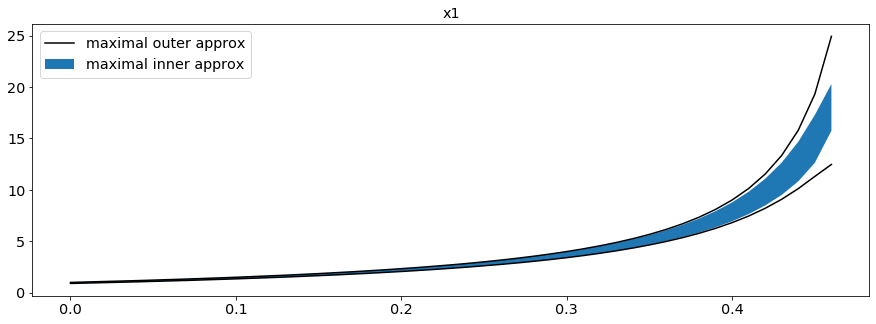

In [413]:
print_robust = False
print_minimal = True
only_one_graph = False
subplots = False

my_function(print_robust,print_minimal,only_one_graph,subplots,print_interactive,variables_to_display)

<Figure size 1080x360 with 0 Axes>

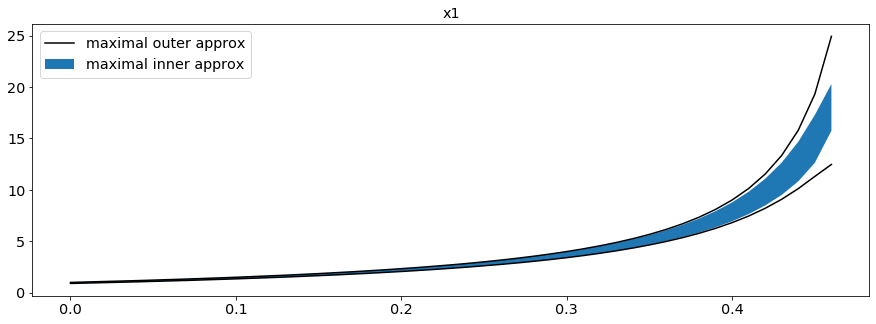

In [414]:
print_robust = False
print_minimal = False
only_one_graph = False
subplots = False

my_function(print_robust,print_minimal,only_one_graph,subplots,print_interactive,variables_to_display)

<Figure size 1080x360 with 0 Axes>

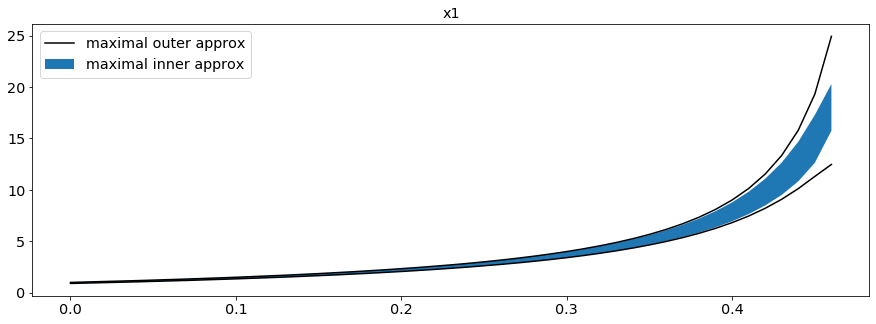

In [415]:
print_robust = True
print_minimal = False
only_one_graph = False
subplots = False

my_function(print_robust,print_minimal,only_one_graph,subplots,print_interactive,variables_to_display)

<Figure size 1080x360 with 0 Axes>

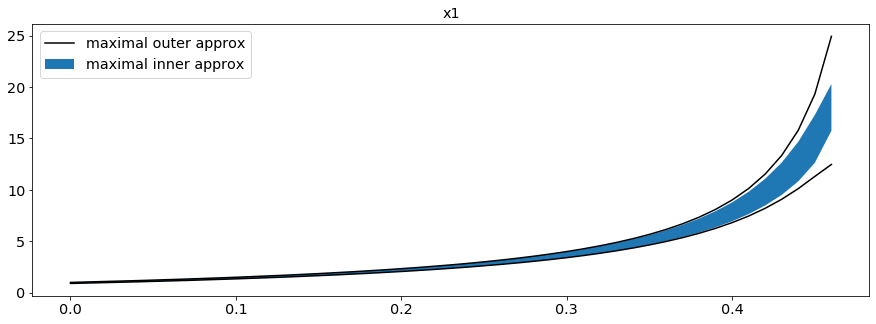

In [416]:
print_robust = True
print_minimal = True
only_one_graph = False
subplots = False

my_function(print_robust,print_minimal,only_one_graph,subplots,print_interactive,variables_to_display)

<Figure size 1080x360 with 0 Axes>

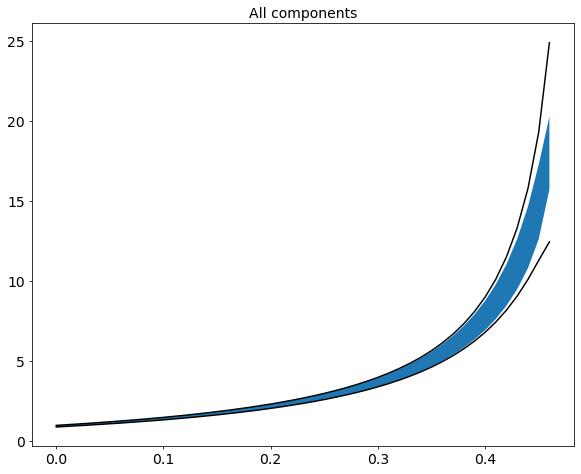

In [417]:
print_robust = False
print_minimal = False
only_one_graph = True
subplots = False
my_function(print_robust,print_minimal,only_one_graph,subplots,print_interactive,variables_to_display)

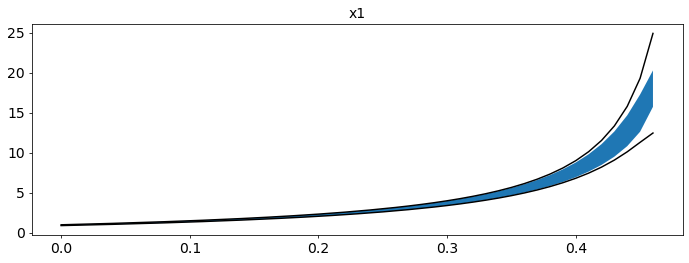

In [418]:
print_robust = False
print_minimal = True
only_one_graph = False
subplots = True
my_function(print_robust,print_minimal,only_one_graph,subplots,print_interactive,variables_to_display)

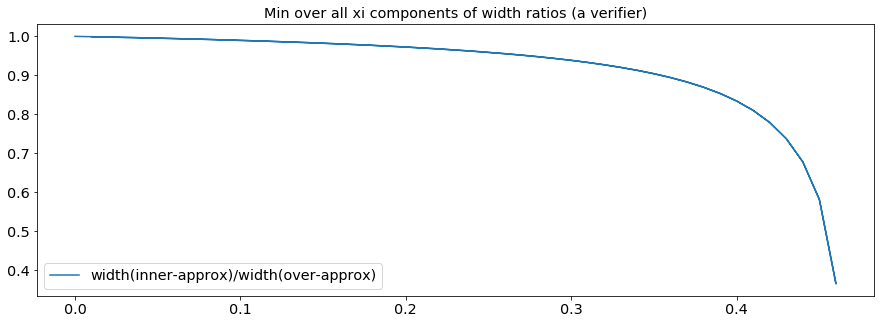

In [419]:
# plotting the width ratio: min over xi of the ratios ? A verifie
fig = plt.figure()
with open("width_ratio.out", 'r') as width_ratio:
    lines = width_ratio.readlines()
    t = [float(line.split()[0]) for line in lines]
    ratio = [float(line.split()[1]) for line in lines]
plt.plot(t , ratio, label='width(inner-approx)/width(over-approx)')
plt.legend() # add the legend specified by the above labels
plt.title("Min over all xi components of width ratios (a verifier)")
plt.savefig("width_ratio.png") # save to file
if (print_interactive):
    plt.show() # print
plt.close()

In [420]:
print_interactive = False

# mean on xi of error between outer-approx and analytical solution if any
fig = plt.figure()
with open("meanerror_diff.out", 'r') as meanerror_diff, open("meanerror_inner.out", 'r') as meanerror_inner, open("meanerror_outer.out", 'r') as meanerror_outer :
    lines1 = meanerror_diff.readlines()
    lines2 = meanerror_inner.readlines()
    lines3 = meanerror_outer.readlines()
    t1 = [float(line.split()[0]) for line in lines1]
    error1 = [float(line.split()[1]) for line in lines1]
    t2 = [float(line.split()[0]) for line in lines2]
    error2 = [float(line.split()[1]) for line in lines2]
    t3 = [float(line.split()[0]) for line in lines3]
    error3 = [float(line.split()[1]) for line in lines3]
plt.plot(t1 , error1, label='Max distance between inner and over-approximation')
if (os.stat("meanerror_inner.out").st_size != 0):
    plt.plot(t2, error2, label='Distance of inner approximation to exact solution')
if (os.stat("meanerror_outer.out").st_size != 0):    
    plt.plot(t3, error3, label='Distance of outer approximation to exact solution')
plt.legend() # add the legend specified by the above labels
plt.title("Mean on xi of distance")
plt.savefig("meanerror.png") # save to file
if (print_interactive):
    plt.show() # print
plt.close()

In [421]:
# mean on xi of error between outer-approx and analytical solution if any
fig = plt.figure()
with open("relmeanerror_diff.out", 'r') as meanerror_diff, open("relmeanerror_inner.out", 'r') as meanerror_inner, open("relmeanerror_outer.out", 'r') as meanerror_outer :
    lines1 = meanerror_diff.readlines()
    lines2 = meanerror_inner.readlines()
    lines3 = meanerror_outer.readlines()
    t1 = [float(line.split()[0]) for line in lines1]
    error1 = [float(line.split()[1]) for line in lines1]
    t2 = [float(line.split()[0]) for line in lines2]
    error2 = [float(line.split()[1]) for line in lines2]
    t3 = [float(line.split()[0]) for line in lines3]
    error3 = [float(line.split()[1]) for line in lines3]
plt.plot(t1 , error1, label='Max relative distance between inner and over-approximation')
if (os.stat("meanerror_inner.out").st_size != 0):
    plt.plot(t2, error2, label='Relative distance of inner approximation to exact solution')
if (os.stat("meanerror_outer.out").st_size != 0):    
    plt.plot(t3, error3, label='Relative distance of outer approximation to exact solution')
plt.legend() # add the legend specified by the above labels
plt.title("Mean on xi of relative distance")
plt.savefig("meanrelativeerror.png") # save to file
if (print_interactive):
    plt.show() # print
plt.close()